<a href="https://colab.research.google.com/github/Hetvi48/AeroCare/blob/main/Outlier_third_notebook_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-Processing

In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [ ]:
df_train = pd.read_csv('drive/MyDrive/archive/CMaps/train_FD004.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test = pd.read_csv('drive/MyDrive/archive/CMaps/test_FD004.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test_RUL = pd.read_csv('drive/MyDrive/archive/CMaps/RUL_FD004.txt',sep=r'\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
df_train.head()


engine  cycle  setting_1  setting_2  setting_3  (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (Fan inlet Pressure) (psia)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Corrected core speed) (rpm)  (Bypass Ratio)   (Burner fuel-air ratio)  (Bleed Enthalpy)  (Required fan speed)  (Required fan conversion speed)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1    42.0049     0.8400      100.0                        445.00                         549.68                        1343.43                        1112.93                         3.91                           5.70                        137.36                     2211.86                      8311.32                            1.01                                41.69                                   129.78                      2387.99                       8074.83           9.3335                     0.02               330                  2212                           100.00                                   10.62                                 6.3670
1       1      2    20.0020     0.7002      100.0                        491.19                         606.07                        1477.61                        1237.50                         9.35                          13.61                        332.10                     2323.66                      8713.60                            1.07                                43.94                                   312.59                      2387.73                       8046.13           9.1913                     0.02               361                  2324                           100.00                                   24.37                                14.6552
2       1      3    42.0038     0.8409      100.0                        445.00                         548.95                        1343.12                        1117.05                         3.91                           5.69                        138.18                     2211.92                      8306.69                            1.01                                41.66                                   129.62                      2387.97                       8066.62           9.4007                     0.02               329                  2212                           100.00                                   10.48                                 6.4213
3       1      4    42.0000     0.8400      100.0                        445.00                         548.70                        1341.24                        1118.03                         3.91                           5.70                        137.98                     2211.88                      8312.35                            1.02                                41.68                                   129.80                      2388.02                       8076.05           9.3369                     0.02               328                  2212                           100.00                                   10.54                                 6.4176
4       1      5    25.0063     0.6207       60.0                        462.54                         536.10                        1255.23                        1033.59                         7.05                           9.00                        174.82                     1915.22                      7994.94                            0.93                                36.48                                   164.11                      2028.08                       7865.80          10.8366                     0.02               305                  1915                  

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   61249 non-null  int64  
 1   cycle                                    61249 non-null  int64  
 2   setting_1                                61249 non-null  float64
 3   setting_2                                61249 non-null  float64
 4   setting_3                                61249 non-null  float64
 5   (Fan inlet temperature) (◦R)             61249 non-null  float64
 6   (LPC outlet temperature) (◦R)            61249 non-null  float64
 7   (HPC outlet temperature) (◦R)            61249 non-null  float64
 8   (LPT outlet temperature) (◦R)            61249 non-null  float64
 9   (Fan inlet Pressure) (psia)              61249 non-null  float64
 10  (bypass-duct pressure) (psia)            61249

In [ ]:
df_train.describe(include='all').T

count         mean         std        min        25%        50%        75%        max
engine                                   61249.0   124.325181   71.995350     1.0000    60.0000   126.0000   185.0000   249.0000
cycle                                    61249.0   134.311417   89.783389     1.0000    62.0000   123.0000   191.0000   543.0000
setting_1                                61249.0    23.999823   14.780722     0.0000    10.0046    25.0014    41.9981    42.0080
setting_2                                61249.0     0.571347    0.310703     0.0000     0.2507     0.7000     0.8400     0.8420
setting_3                                61249.0    94.031576   14.251954    60.0000   100.0000   100.0000   100.0000   100.0000
(Fan inlet temperature) (◦R)             61249.0   472.882435   26.436832   445.0000   445.0000   462.5400   491.1900   518.6700
(LPC outlet temperature) (◦R)            61249.0   579.420056   37.342647   535.4800   549.3300   555.7400   607.0700   644.4200
(HPC outlet temperature) (◦R)            61249.0  1417.896600  106.167598  1242.6700  1350.5500  1367.6800  1497.4200  1613.0000
(LPT outlet temperature) (◦R)            61249.0  1201.915359  119.327591  1024.4200  1119.4900  1136.9200  1302.6200  1440.7700
(Fan inlet Pressure) (psia)              61249.0     8.031626    3.622872     3.9100     3.9100     7.0500    10.5200    14.6200
(bypass-duct pressure) (psia)            61249.0    11.589457    5.444017     5.6700     5.7200     9.0300    15.4800    21.6100
(HPC outlet pressure) (psia)             61249.0   283.328633  146.880210   136.1700   142.9200   194.9600   394.2800   570.8100
(Physical fan speed) (rpm)               61249.0  2228.686034  145.348243  1914.7200  2211.9500  2223.0700  2323.9300  2388.6400
(Physical core speed) (rpm)              61249.0  8524.673301  336.927547  7984.5100  8320.5900  8362.7600  8777.2500  9196.8100
(Engine pressure ratio(P50/P2)           61249.0     1.096445    0.127681     0.9300     1.0200     1.0300     1.2600     1.3200
(HPC outlet Static pressure) (psia)      61249.0    42.874529    3.243492    36.0400    41.7600    42.3300    45.2200    48.3600
(Ratio of fuel flow to Ps30) (pps/psia)  61249.0   266.735665  138.479109   128.3100   134.5200   183.4500   371.4000   537.4900
(Corrected fan speed) (rpm)              61249.0  2334.427590  128.197859  2027.5700  2387.9100  2388.0600  2388.1700  2390.4900
(Corrected core speed) (rpm)             61249.0  8067.811812   85.670543  7845.7800  8062.6300  8083.8100  8128.3500  8261.6500
(Bypass Ratio)                           61249.0     9.285604    0.750374     8.1757     8.6480     9.2556     9.3658    11.0663
(Burner fuel-air ratio)                  61249.0     0.023252    0.004685     0.0200     0.0200     0.0200     0.0300     0.0300
(Bleed Enthalpy)                         61249.0   347.760029   27.808283   302.0000   330.0000   334.0000   368.0000   399.0000
(Required fan speed)                     61249.0  2228.613283  145.472491  1915.0000  2212.0000  2223.0000  2324.0000  2388.0000
(Required fan conversion speed)          61249.0    97.751396    5.369424    84.9300   100.0000   100.0000   100.0000   100.0000
(High-pressure turbines Cool air flow)   61249.0    20.864333    9.936396    10.1600    10.9400    14.9300    28.5600    39.8900
(Low-pressure turbines Cool air flow)    61249.0    12.518995    5.962697     6.0843     6.5661     8.9601    17.1355    23.8852

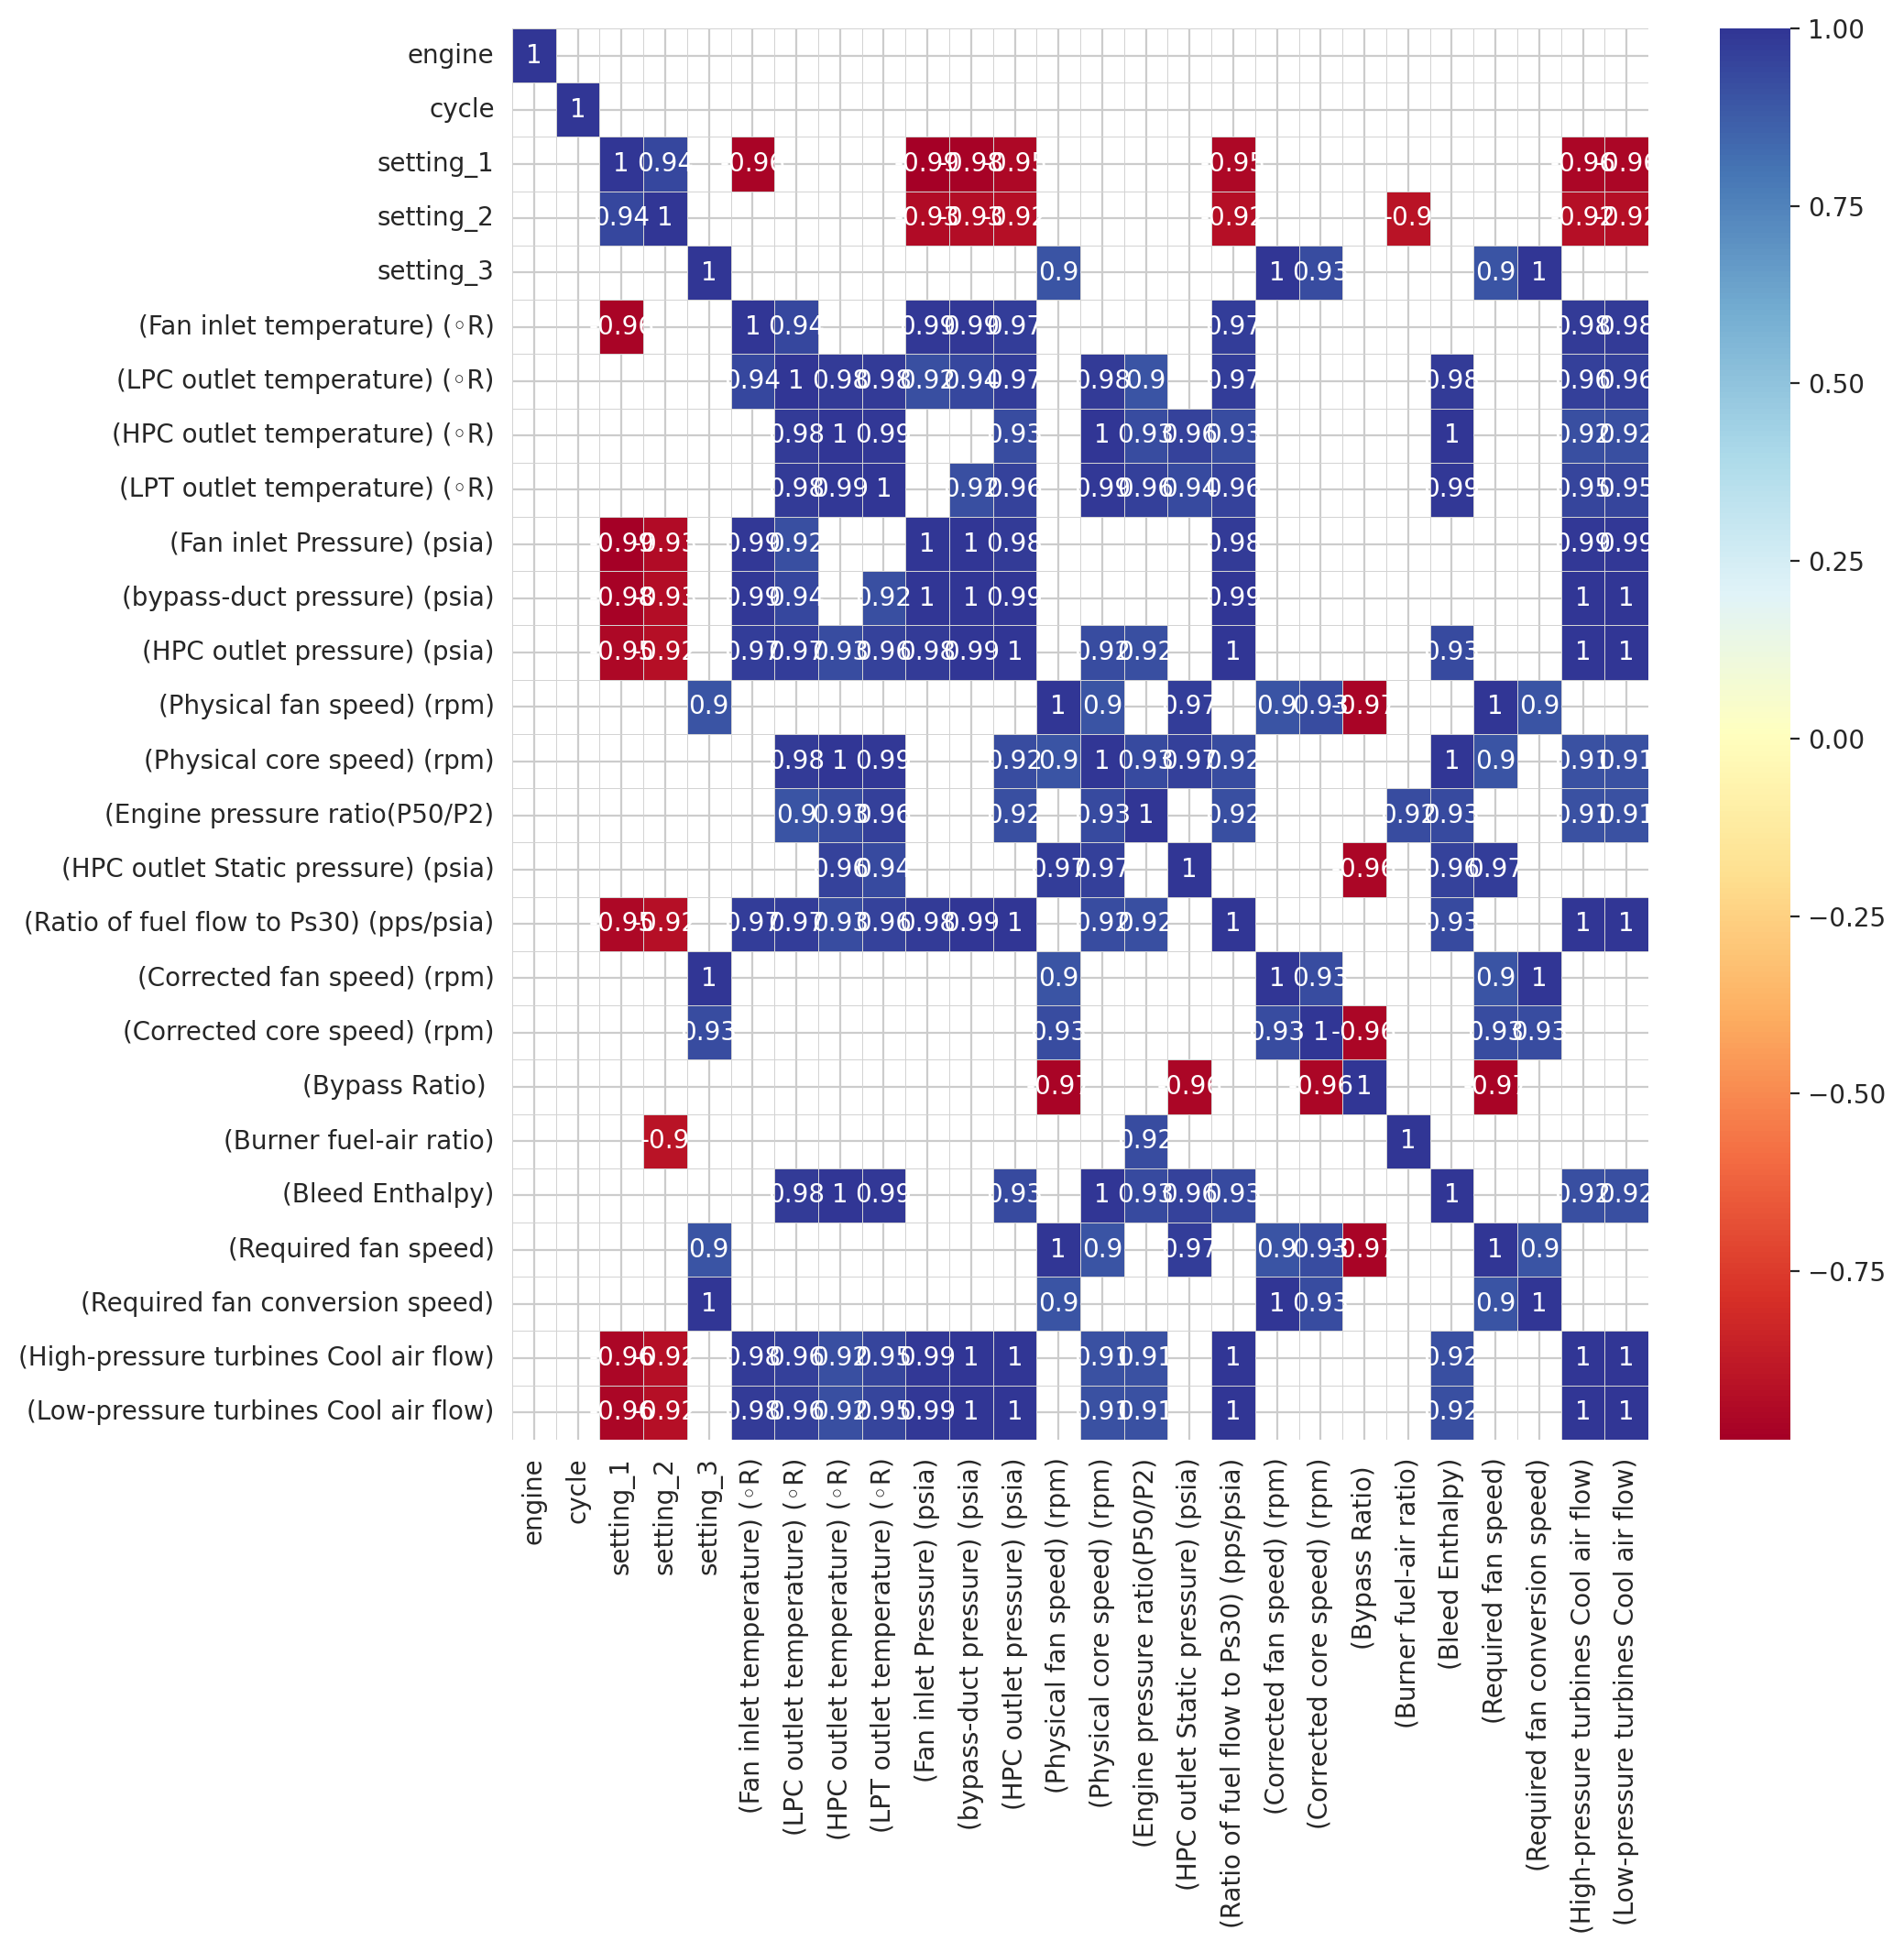

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
# drop the sensors wiith constant values
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

[]


In [ ]:
# drop all but one of the highly correlated features
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

['(Fan inlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical core speed) (rpm)', '(Engine pressure ratio(P50/P2)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)', '(Required fan speed)', '(Required fan conversion speed)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


In [ ]:
list(df_train)


['engine',
 'cycle',
 'setting_1',
 'setting_2',
 'setting_3',
 '(LPC outlet temperature) (◦R)',
 '(Physical fan speed) (rpm)',
 '(Corrected core speed) (rpm)',
 '(Burner fuel-air ratio)']

In [ ]:
df_train.head()

engine  cycle  setting_1  setting_2  setting_3  (LPC outlet temperature) (◦R)  (Physical fan speed) (rpm)  (Corrected core speed) (rpm)  (Burner fuel-air ratio)
0       1      1    42.0049     0.8400      100.0                         549.68                     2211.86                       8074.83                     0.02
1       1      2    20.0020     0.7002      100.0                         606.07                     2323.66                       8046.13                     0.02
2       1      3    42.0038     0.8409      100.0                         548.95                     2211.92                       8066.62                     0.02
3       1      4    42.0000     0.8400      100.0                         548.70                     2211.88                       8076.05                     0.02
4       1      5    25.0063     0.6207       60.0                         536.10                     1915.22                       7865.80                     0.02

In [ ]:
features = list(df_train.columns)

In [ ]:
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

engine - 0
cycle - 0
setting_1 - 0
setting_2 - 0
setting_3 - 0
(LPC outlet temperature) (◦R) - 0
(Physical fan speed) (rpm) - 0
(Corrected core speed) (rpm) - 0
(Burner fuel-air ratio) - 0


In [ ]:
# define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life
df_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
df_train_RUL.rename(columns={'cycle':'life'},inplace=True)
df_train_RUL.head()

life
engine      
1        321
2        299
3        307
4        274
5        193

In [ ]:
df_train=df_train.merge(df_train_RUL,how='left',on=['engine'])

In [ ]:
df_train['RUL']=df_train['life']-df_train['cycle']
df_train.drop(['life'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

engine  cycle  setting_1  setting_2  setting_3  (LPC outlet temperature) (◦R)  (Physical fan speed) (rpm)  (Corrected core speed) (rpm)  (Burner fuel-air ratio)  RUL
0       1      1    42.0049     0.8400      100.0                         549.68                     2211.86                       8074.83                     0.02  125
1       1      2    20.0020     0.7002      100.0                         606.07                     2323.66                       8046.13                     0.02  125
2       1      3    42.0038     0.8409      100.0                         548.95                     2211.92                       8066.62                     0.02  125
3       1      4    42.0000     0.8400      100.0                         548.70                     2211.88                       8076.05                     0.02  125
4       1      5    25.0063     0.6207       60.0                         536.10                     1915.22                       7865.80                     0.02  125

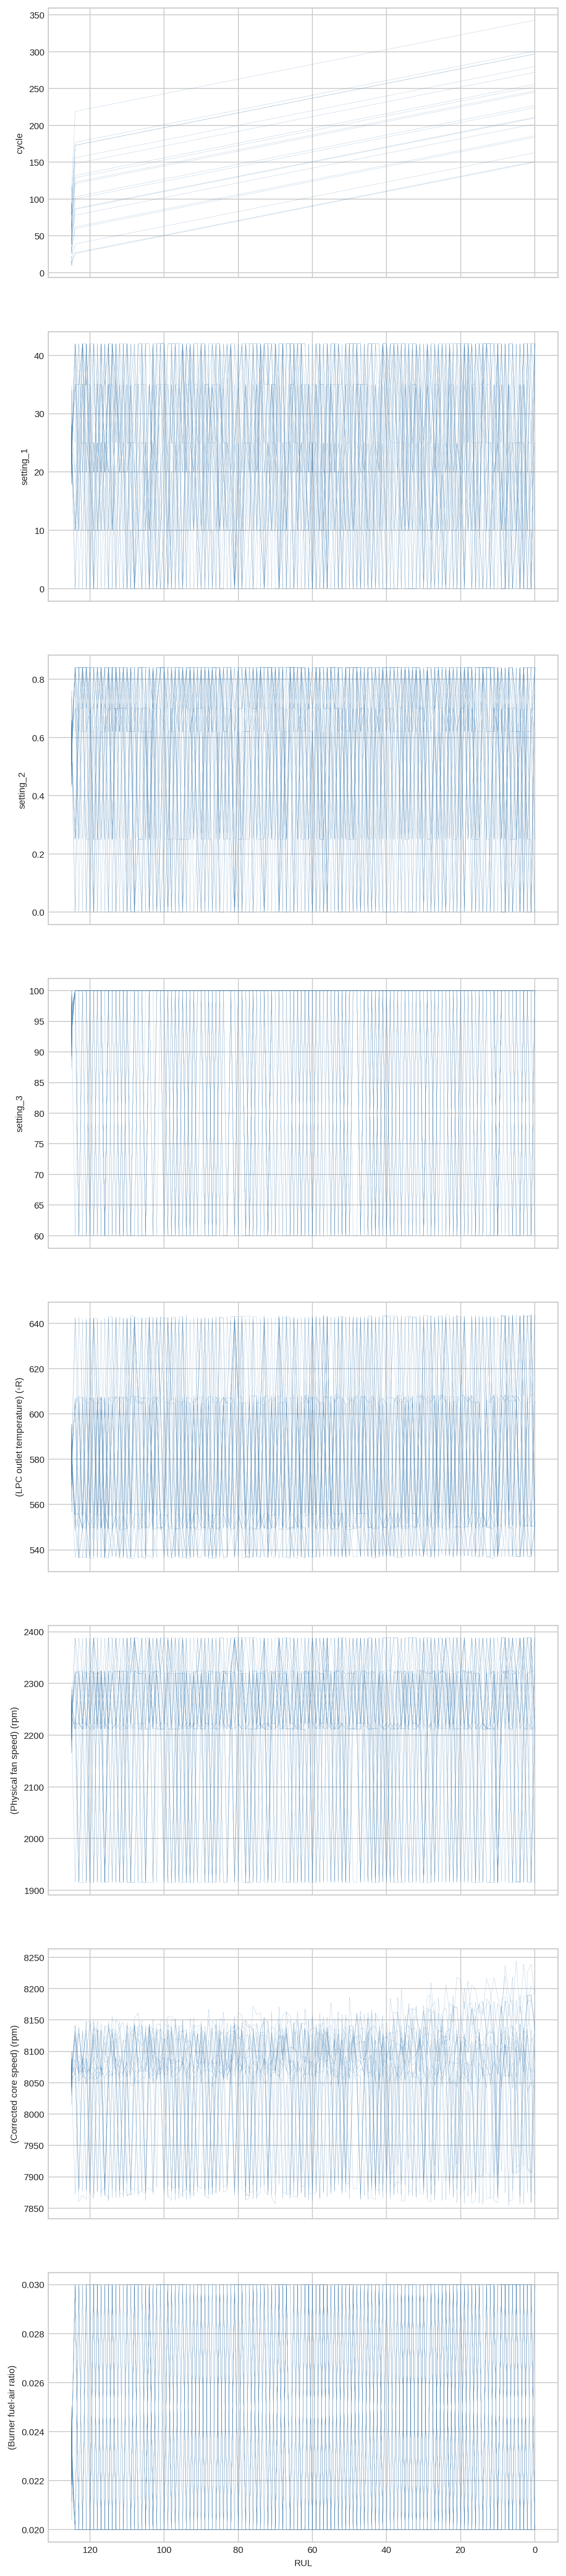

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=8,40
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1
plot_items = list(df_train.columns)[1:-1]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

engines = list(df_train['engine'].unique())

for engine in engines[10:30]:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['engine']==engine],x='RUL',y=item,color='steelblue',ax=ax[i],
        )

In [ ]:
from scipy import signal
def smooth_function(x,window=15,order=3):
    return signal.savgol_filter(x,window,order)

In [ ]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
backward_regression(X, y)


Selected Features:
['cycle', 'setting_1', 'setting_2', 'setting_3', '(LPC outlet temperature) (◦R)', '(Physical fan speed) (rpm)', '(Corrected core speed) (rpm)', '(Burner fuel-air ratio)']


In [ ]:
Selected_Features

[['cycle',
  'setting_1',
  'setting_2',
  'setting_3',
  '(LPC outlet temperature) (◦R)',
  '(Physical fan speed) (rpm)',
  '(Corrected core speed) (rpm)',
  '(Burner fuel-air ratio)']]

In [ ]:
# X.head()
feature_names = Selected_Features[0]
np.shape(X)

(61249, 8)

In [ ]:
len(feature_names)

8

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
X_train.head()

cycle  setting_1  setting_2  setting_3  (LPC outlet temperature) (◦R)  (Physical fan speed) (rpm)  (Corrected core speed) (rpm)  (Burner fuel-air ratio)
0      1    42.0049     0.8400      100.0                         549.68                     2211.86                       8074.83                     0.02
1      2    20.0020     0.7002      100.0                         606.07                     2323.66                       8046.13                     0.02
2      3    42.0038     0.8409      100.0                         548.95                     2211.92                       8066.62                     0.02
3      4    42.0000     0.8400      100.0                         548.70                     2211.88                       8076.05                     0.02
4      5    25.0063     0.6207       60.0                         536.10                     1915.22                       7865.80                     0.02

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# KNN

In [ ]:
# %%time
# from sklearn.neighbors import KNeighborsRegressor
# start = time.time()
# model = KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE by taking the square root of mean_squared_error
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['kNN'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=5,5
# plt.rcParams['font.family'] = 'Calibri'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize']=20
# plt.rcParams['xtick.labelsize']=16
# plt.rcParams['ytick.labelsize']=16
# plt.rcParams['legend.fontsize']=16

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
#                   'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions))),
#              xy=(0,100),
#              size='medium')

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# pip install -U scikit-learn


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import mean_squared_error

# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize'] = (5, 5)
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['legend.fontsize'] = 16

# fig, ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')

# g = sns.scatterplot(
#     x=y_test,
#     y=y_predictions,
#     s=100,
#     alpha=0.6,
#     linewidth=1,
#     edgecolor='black',
#     ax=ax
# )

# sns.lineplot(
#     x=[min(y_test), max(y_test)],
#     y=[min(y_test), max(y_test)],
#     linewidth=4,
#     color='gray',
#     ax=ax
# )

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()
# plt.show()


In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# SVM

In [ ]:
# %%time
# from sklearn.svm import SVR
# start = time.time()
# model = SVR(kernel="rbf", C=100, gamma=0.5, epsilon=0.01).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['SVM'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize'] = (5, 5)
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['legend.fontsize'] = 16

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# Random Forest

In [ ]:
# type(X_train)

In [ ]:
# %%time
# from sklearn.ensemble import RandomForestRegressor
# start = time.time()
# model = RandomForestRegressor(n_jobs=-1,
#                               n_estimators=500,
#                               min_samples_leaf=1,
#                               max_features='sqrt',
#                              ).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=5,5

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# LSTM

In [ ]:
# !pip install tensorflow keras --upgrade


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import sklearn

In [ ]:
model = keras.Sequential()
model.add(LSTM(100,
                return_sequences=True,
               input_shape=(1,X_train.shape[1])
              ))
model.add(BatchNormalization())
model.add(LSTM(50,
                return_sequences=True,
               activation='tanh'
              ))
model.add(Dropout(0.5))
model.add(LSTM(10,
               return_sequences=True,
               activation='tanh',
              ))
model.add(Dropout(0.5))
model.add(Dense(100,
               activation='relu',
              ))
model.add(Dense(1))

In [ ]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        43,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 10)          │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 100)         │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,841 (304.07 KB)

 Trainable params: 77,641 (303.29 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-7, verbose=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 30,
                    # shuffle = True,
                    batch_size = 500,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions = y_predictions[:,0][:,0]

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 9997.6475 - val_loss: 8219.7705 - learning_rate: 0.0010
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6112.3979 - val_loss: 2741.1213 - learning_rate: 0.0010
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2606.8630 - val_loss: 5385.3901 - learning_rate: 0.0010
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1925.4032 - val_loss: 4736.7939 - learning_rate: 0.0010
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1723.4189 - val_loss: 1171.3593 - learning_rate: 0.0010
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1619.7795 - val_loss: 952.9737 - learning_rate: 0.0010
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1427.4430 - val_loss: 850.7218 - learning_rate: 0.0010
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1365.8373 - val_loss: 839.5663 - learning_rate: 0.0010
Epoch 9/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1294.7

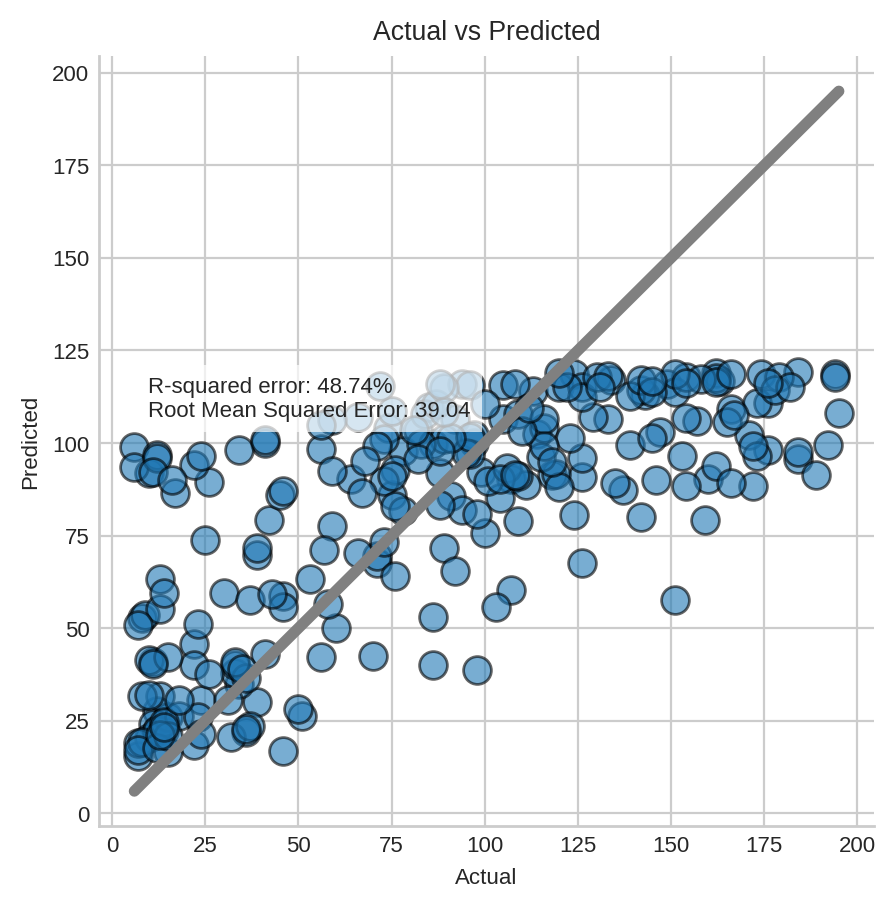

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
r2 = sklearn.metrics.r2_score(y_test, y_predictions) # Calculate R2 using sklearn.metrics.r2_score
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(r2) + '\n' + # Use the calculated R2
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

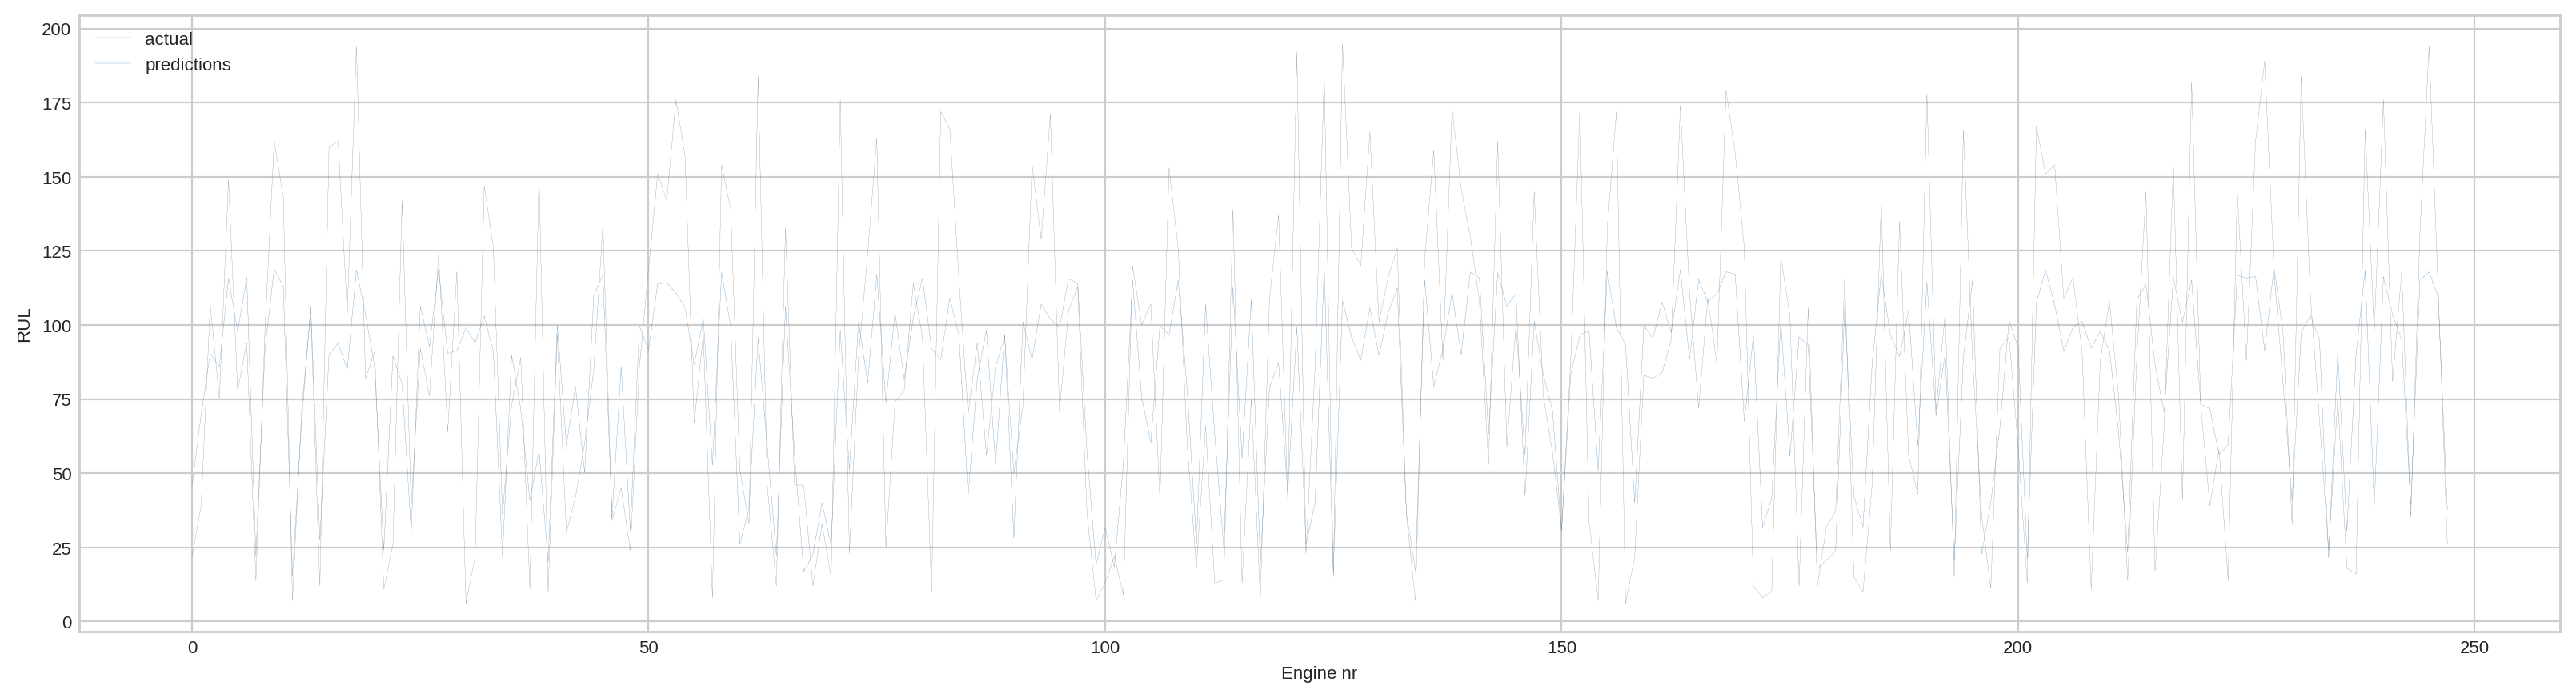

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

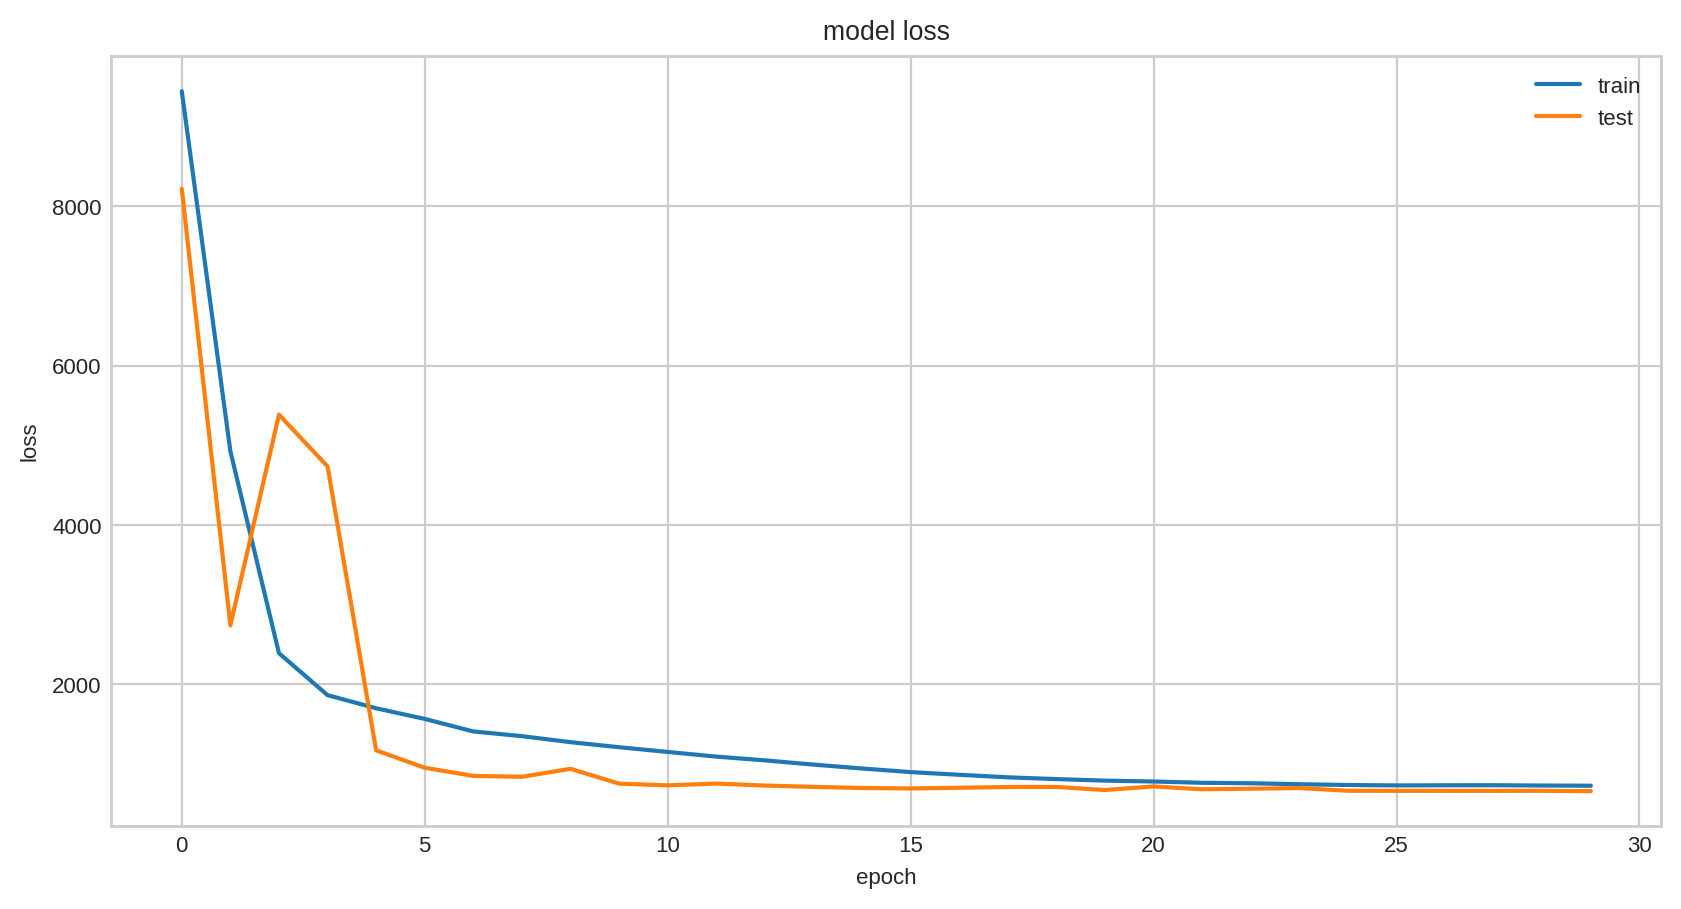

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=5,5
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


In [ ]:
# model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
#                                                                      'RMSE': '{:.2f}',
#                                                                      'time to train':'{:.3f}',
#                                                                      'time to predict':'{:.3f}',
#                                                                      'total time':'{:.3f}',
#                                                                      })

# Best Model

##############

# Outlier detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

# ========================================
# OUTLIER DETECTION FOR NUMPY ARRAYS
# ========================================

def remove_outliers_numpy(X_train, y_train, method='iqr', column_names=None):
    """
    Remove outliers from numpy arrays

    Parameters:
    -----------
    X_train : numpy.ndarray
        Training features array
    y_train : numpy.ndarray
        Training target array
    method : str
        'iqr', 'zscore', or 'isolation'
    column_names : list, optional
        Feature names for better visualization

    Returns:
    --------
    X_train_clean : numpy.ndarray
        Clean training features
    y_train_clean : numpy.ndarray
        Clean training targets
    """

    print("="*60)
    print("OUTLIER DETECTION AND REMOVAL")
    print("="*60)
    print(f"Original X_train shape: {X_train.shape}")
    print(f"Original y_train shape: {y_train.shape}")

    # Create column names if not provided
    if column_names is None:
        column_names = [f'feature_{i}' for i in range(X_train.shape[1])]

    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame(X_train, columns=column_names)

    # Visualize before outlier removal
    print("\n" + "="*60)
    print("VISUALIZING DATA BEFORE OUTLIER REMOVAL")
    print("="*60)
    visualize_boxplots(df, column_names, "Before Outlier Removal")

    # Detect outliers based on method
    print("\n" + "="*60)
    print(f"DETECTING OUTLIERS USING {method.upper()} METHOD")
    print("="*60)

    if method == 'iqr':
        outlier_indices = detect_outliers_iqr(df, column_names)
    elif method == 'zscore':
        outlier_indices = detect_outliers_zscore(df, column_names, threshold=3)
    elif method == 'isolation':
        outlier_indices = detect_outliers_isolation_forest(df, column_names)
    else:
        raise ValueError("Method must be 'iqr', 'zscore', or 'isolation'")

    # Create mask for clean data (inliers)
    mask = np.ones(len(X_train), dtype=bool)
    mask[outlier_indices] = False

    # Remove outliers
    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    # Statistics
    print("\n" + "="*60)
    print("OUTLIER REMOVAL SUMMARY")
    print("="*60)
    print(f"Total rows in original data: {len(X_train)}")
    print(f"Outliers detected and removed: {len(outlier_indices)}")
    print(f"Clean data rows: {len(X_train_clean)}")
    print(f"Percentage of data retained: {(len(X_train_clean)/len(X_train))*100:.2f}%")

    # Visualize after outlier removal
    df_clean = pd.DataFrame(X_train_clean, columns=column_names)
    print("\n" + "="*60)
    print("VISUALIZING DATA AFTER OUTLIER REMOVAL")
    print("="*60)
    visualize_boxplots(df_clean, column_names, "After Outlier Removal")

    # Compare statistics
    print("\n" + "="*60)
    print("STATISTICS COMPARISON")
    print("="*60)
    compare_statistics(df, df_clean, column_names)

    return X_train_clean, y_train_clean


def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outlier_indices = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_list = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices.extend(outlier_list)

        print(f"\n{col}:")
        print(f"  Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Outliers: {len(outlier_list)}")

    return list(set(outlier_indices))


def detect_outliers_zscore(df, columns, threshold=3):
    """Detect outliers using Z-score method"""
    outlier_indices = []

    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outlier_list = np.where(z_scores > threshold)[0].tolist()
        outlier_indices.extend(outlier_list)

        print(f"\n{col}:")
        print(f"  Mean={df[col].mean():.2f}, Std={df[col].std():.2f}")
        print(f"  Z-score threshold: {threshold}")
        print(f"  Outliers: {len(outlier_list)}")

    return list(set(outlier_indices))


def detect_outliers_isolation_forest(df, columns, contamination=0.05):
    """Detect outliers using Isolation Forest"""
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(df[columns])
    outlier_indices = np.where(outlier_labels == -1)[0].tolist()

    print(f"\nIsolation Forest (contamination={contamination}):")
    print(f"  Outliers detected: {len(outlier_indices)}")

    return outlier_indices


def visualize_boxplots(df, columns, title):
    """Create boxplots for visualization"""
    n_cols = len(columns)
    n_rows = (n_cols + 3) // 4  # 4 plots per row

    fig, axes = plt.subplots(n_rows, min(4, n_cols), figsize=(16, 4*n_rows))

    if n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if n_cols > 1 else [axes]
    else:
        axes = axes.flatten()

    for idx, col in enumerate(columns):
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_title(col, fontsize=10)
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

    # Hide extra subplots
    for idx in range(len(columns), len(axes)):
        axes[idx].axis('off')

    plt.suptitle(title, fontsize=14, y=1.00)
    plt.tight_layout()
    plt.show()


def compare_statistics(df_original, df_clean, columns):
    """Compare statistics before and after outlier removal"""
    print(f"\n{'Column':<20} {'Metric':<10} {'Original':<12} {'Clean':<12} {'Change':<10}")
    print("-" * 70)

    for col in columns:
        # Mean
        orig_mean = df_original[col].mean()
        clean_mean = df_clean[col].mean()
        change = ((clean_mean - orig_mean) / orig_mean * 100) if orig_mean != 0 else 0
        print(f"{col:<20} {'Mean':<10} {orig_mean:<12.2f} {clean_mean:<12.2f} {change:>+9.2f}%")

        # Std
        orig_std = df_original[col].std()
        clean_std = df_clean[col].std()
        change = ((clean_std - orig_std) / orig_std * 100) if orig_std != 0 else 0
        print(f"{'':<20} {'Std':<10} {orig_std:<12.2f} {clean_std:<12.2f} {change:>+9.2f}%")

        # Min/Max
        print(f"{'':<20} {'Min':<10} {df_original[col].min():<12.2f} {df_clean[col].min():<12.2f}")
        print(f"{'':<20} {'Max':<10} {df_original[col].max():<12.2f} {df_clean[col].max():<12.2f}")
        print()


# ========================================
# USAGE - COPY THIS TO YOUR NOTEBOOK
# ========================================

"""
# STEP 1: Remove outliers from your training data
# Choose method: 'iqr' (recommended), 'zscore', or 'isolation'

X_train_clean, y_train_clean = remove_outliers_numpy(
    X_train=X_train,
    y_train=y_train,
    method='iqr',  # Options: 'iqr', 'zscore', 'isolation'
    column_names=None  # Provide your actual column names if you have them
)

# STEP 2: Now use the clean data for model training
# Your X_train_clean and y_train_clean are ready!

# Example:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train_clean, y_train_clean)
# predictions = model.predict(X_test)
"""

# ========================================
# ALTERNATIVE: If you want only specific method
# ========================================

def remove_outliers_iqr_only(X_train, y_train):
    """Quick IQR-based outlier removal"""
    df = pd.DataFrame(X_train)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Create mask for rows without outliers
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    print(f"Original size: {len(X_train)}")
    print(f"Removed: {len(X_train) - len(X_train_clean)}")
    print(f"Clean size: {len(X_train_clean)}")

    return X_train_clean, y_train_clean


def remove_outliers_zscore_only(X_train, y_train, threshold=3):
    """Quick Z-score based outlier removal"""
    z_scores = np.abs(stats.zscore(X_train))
    mask = (z_scores < threshold).all(axis=1)

    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    print(f"Original size: {len(X_train)}")
    print(f"Removed: {len(X_train) - len(X_train_clean)}")
    print(f"Clean size: {len(X_train_clean)}")

    return X_train_clean, y_train_clean

OUTLIER DETECTION AND REMOVAL
Original X_train shape: (61249, 8)
Original y_train shape: (61249,)

VISUALIZING DATA BEFORE OUTLIER REMOVAL


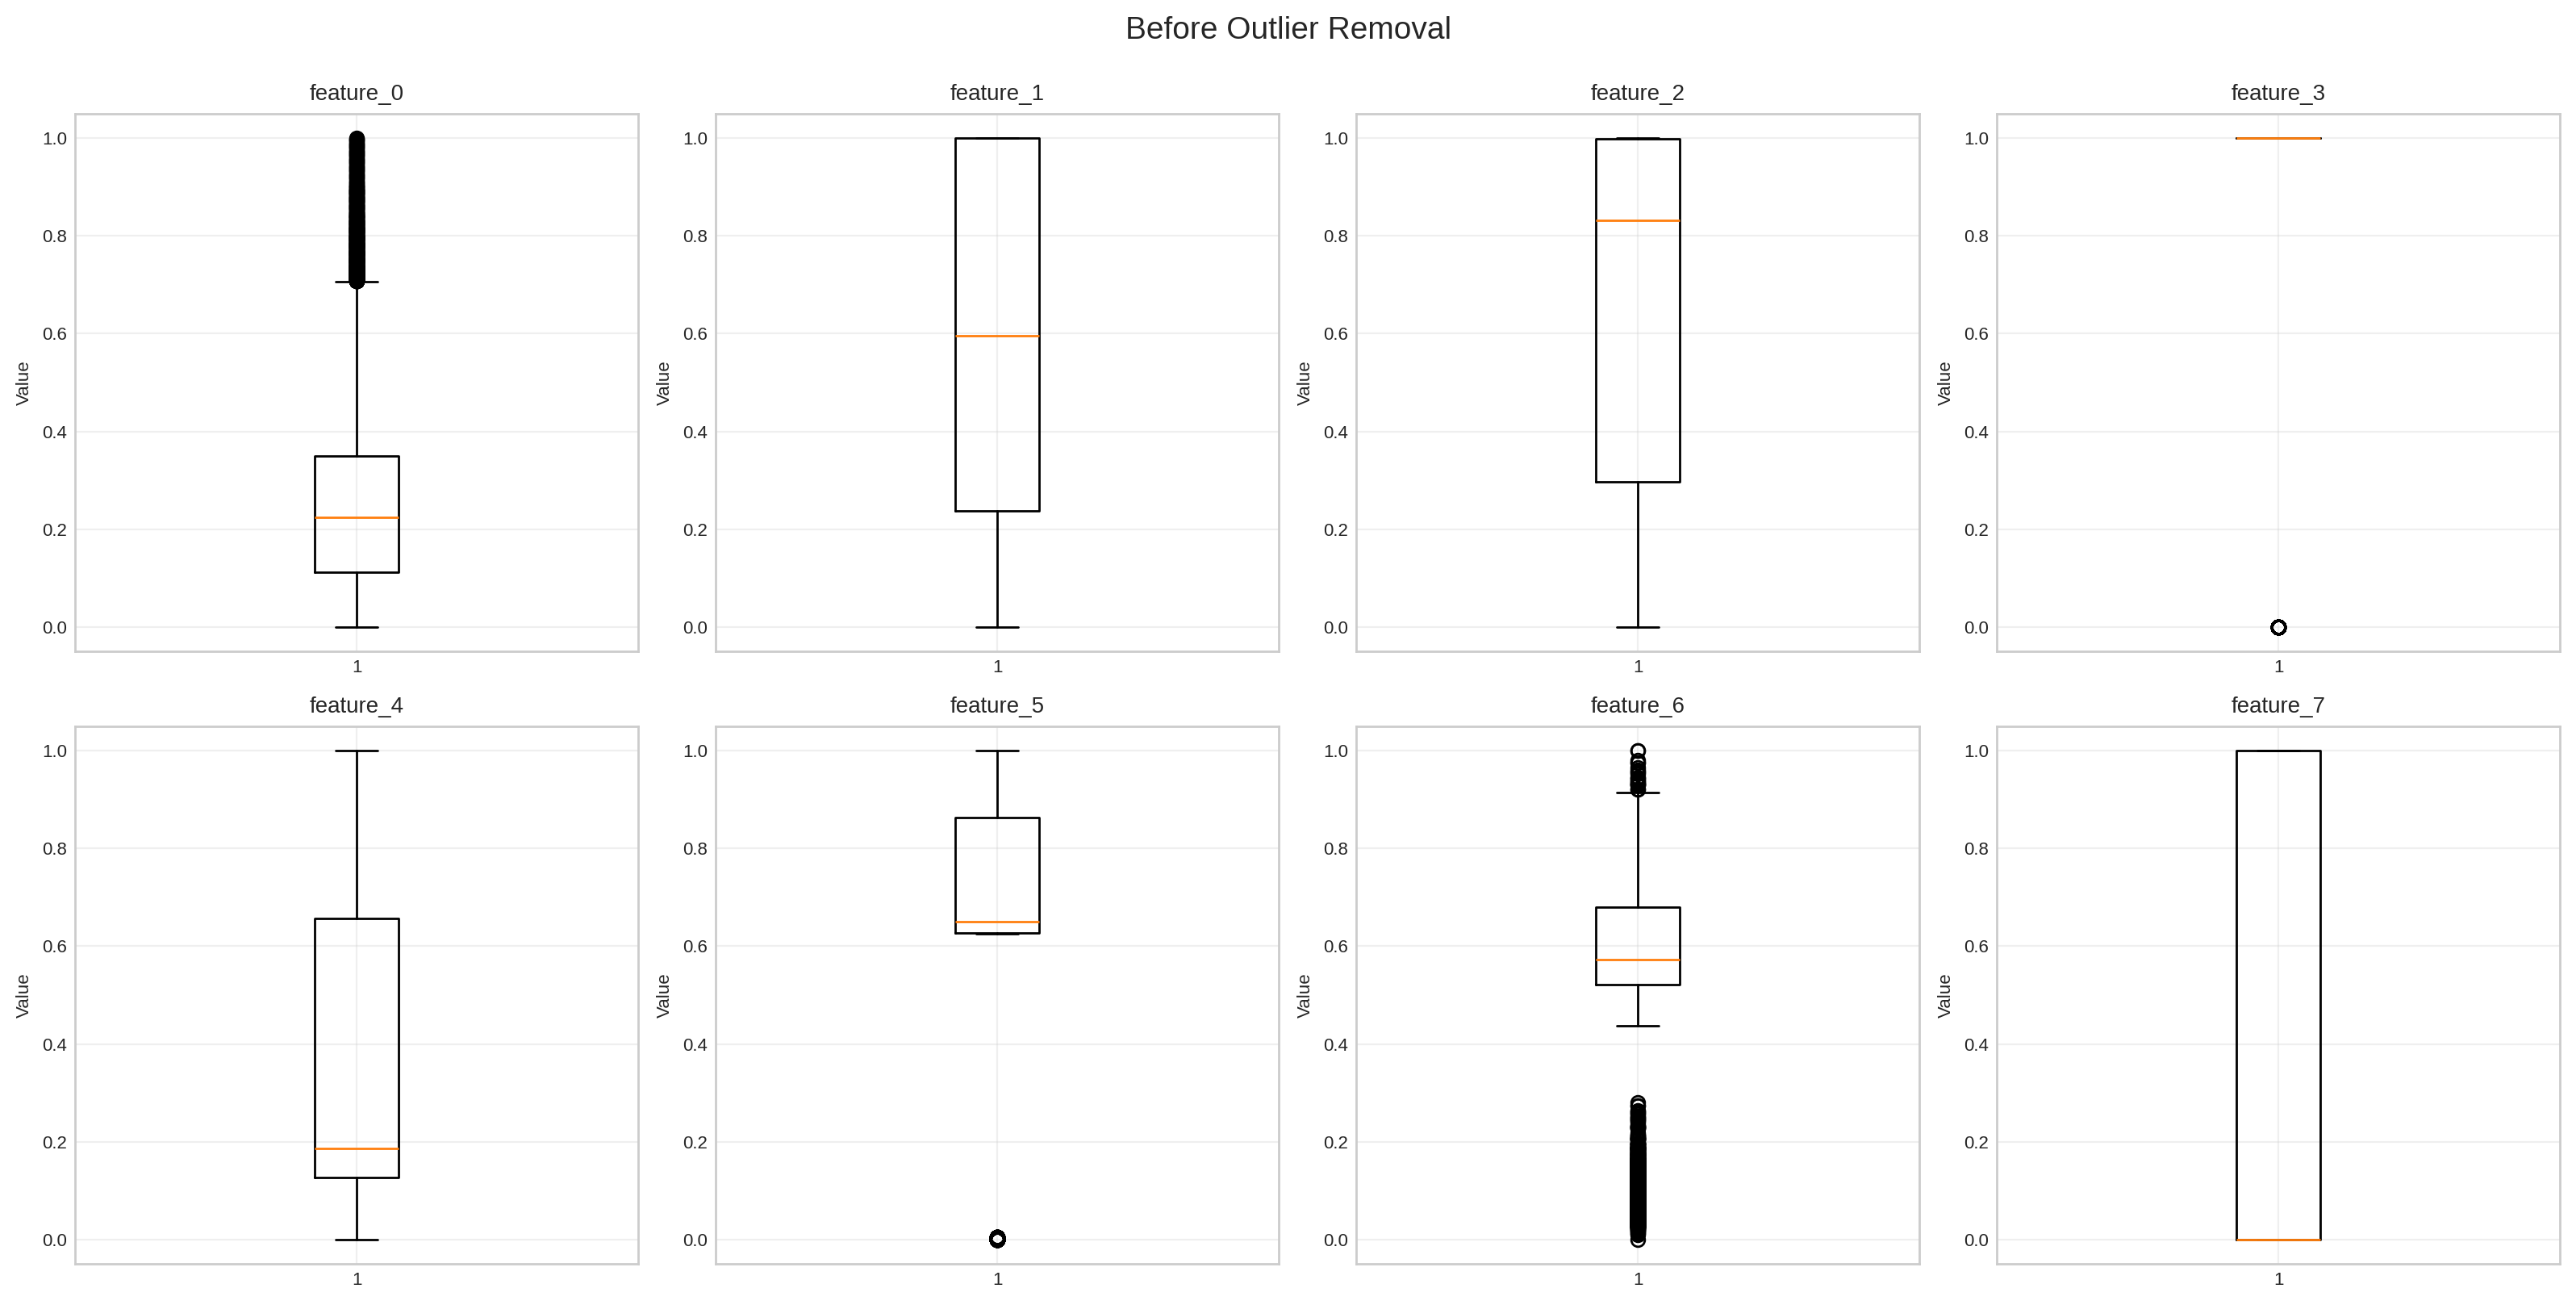


DETECTING OUTLIERS USING IQR METHOD

feature_0:
  Q1=0.11, Q3=0.35, IQR=0.24
  Bounds: [-0.24, 0.71]
  Outliers: 522

feature_1:
  Q1=0.24, Q3=1.00, IQR=0.76
  Bounds: [-0.90, 2.14]
  Outliers: 0

feature_2:
  Q1=0.30, Q3=1.00, IQR=0.70
  Bounds: [-0.75, 2.05]
  Outliers: 0

feature_3:
  Q1=1.00, Q3=1.00, IQR=0.00
  Bounds: [1.00, 1.00]
  Outliers: 9139

feature_4:
  Q1=0.13, Q3=0.66, IQR=0.53
  Bounds: [-0.67, 1.45]
  Outliers: 0

feature_5:
  Q1=0.63, Q3=0.86, IQR=0.24
  Bounds: [0.27, 1.22]
  Outliers: 9139

feature_6:
  Q1=0.52, Q3=0.68, IQR=0.16
  Bounds: [0.28, 0.92]
  Outliers: 9162

feature_7:
  Q1=0.00, Q3=1.00, IQR=1.00
  Bounds: [-1.50, 2.50]
  Outliers: 0

OUTLIER REMOVAL SUMMARY
Total rows in original data: 61249
Outliers detected and removed: 9615
Clean data rows: 51634
Percentage of data retained: 84.30%

VISUALIZING DATA AFTER OUTLIER REMOVAL


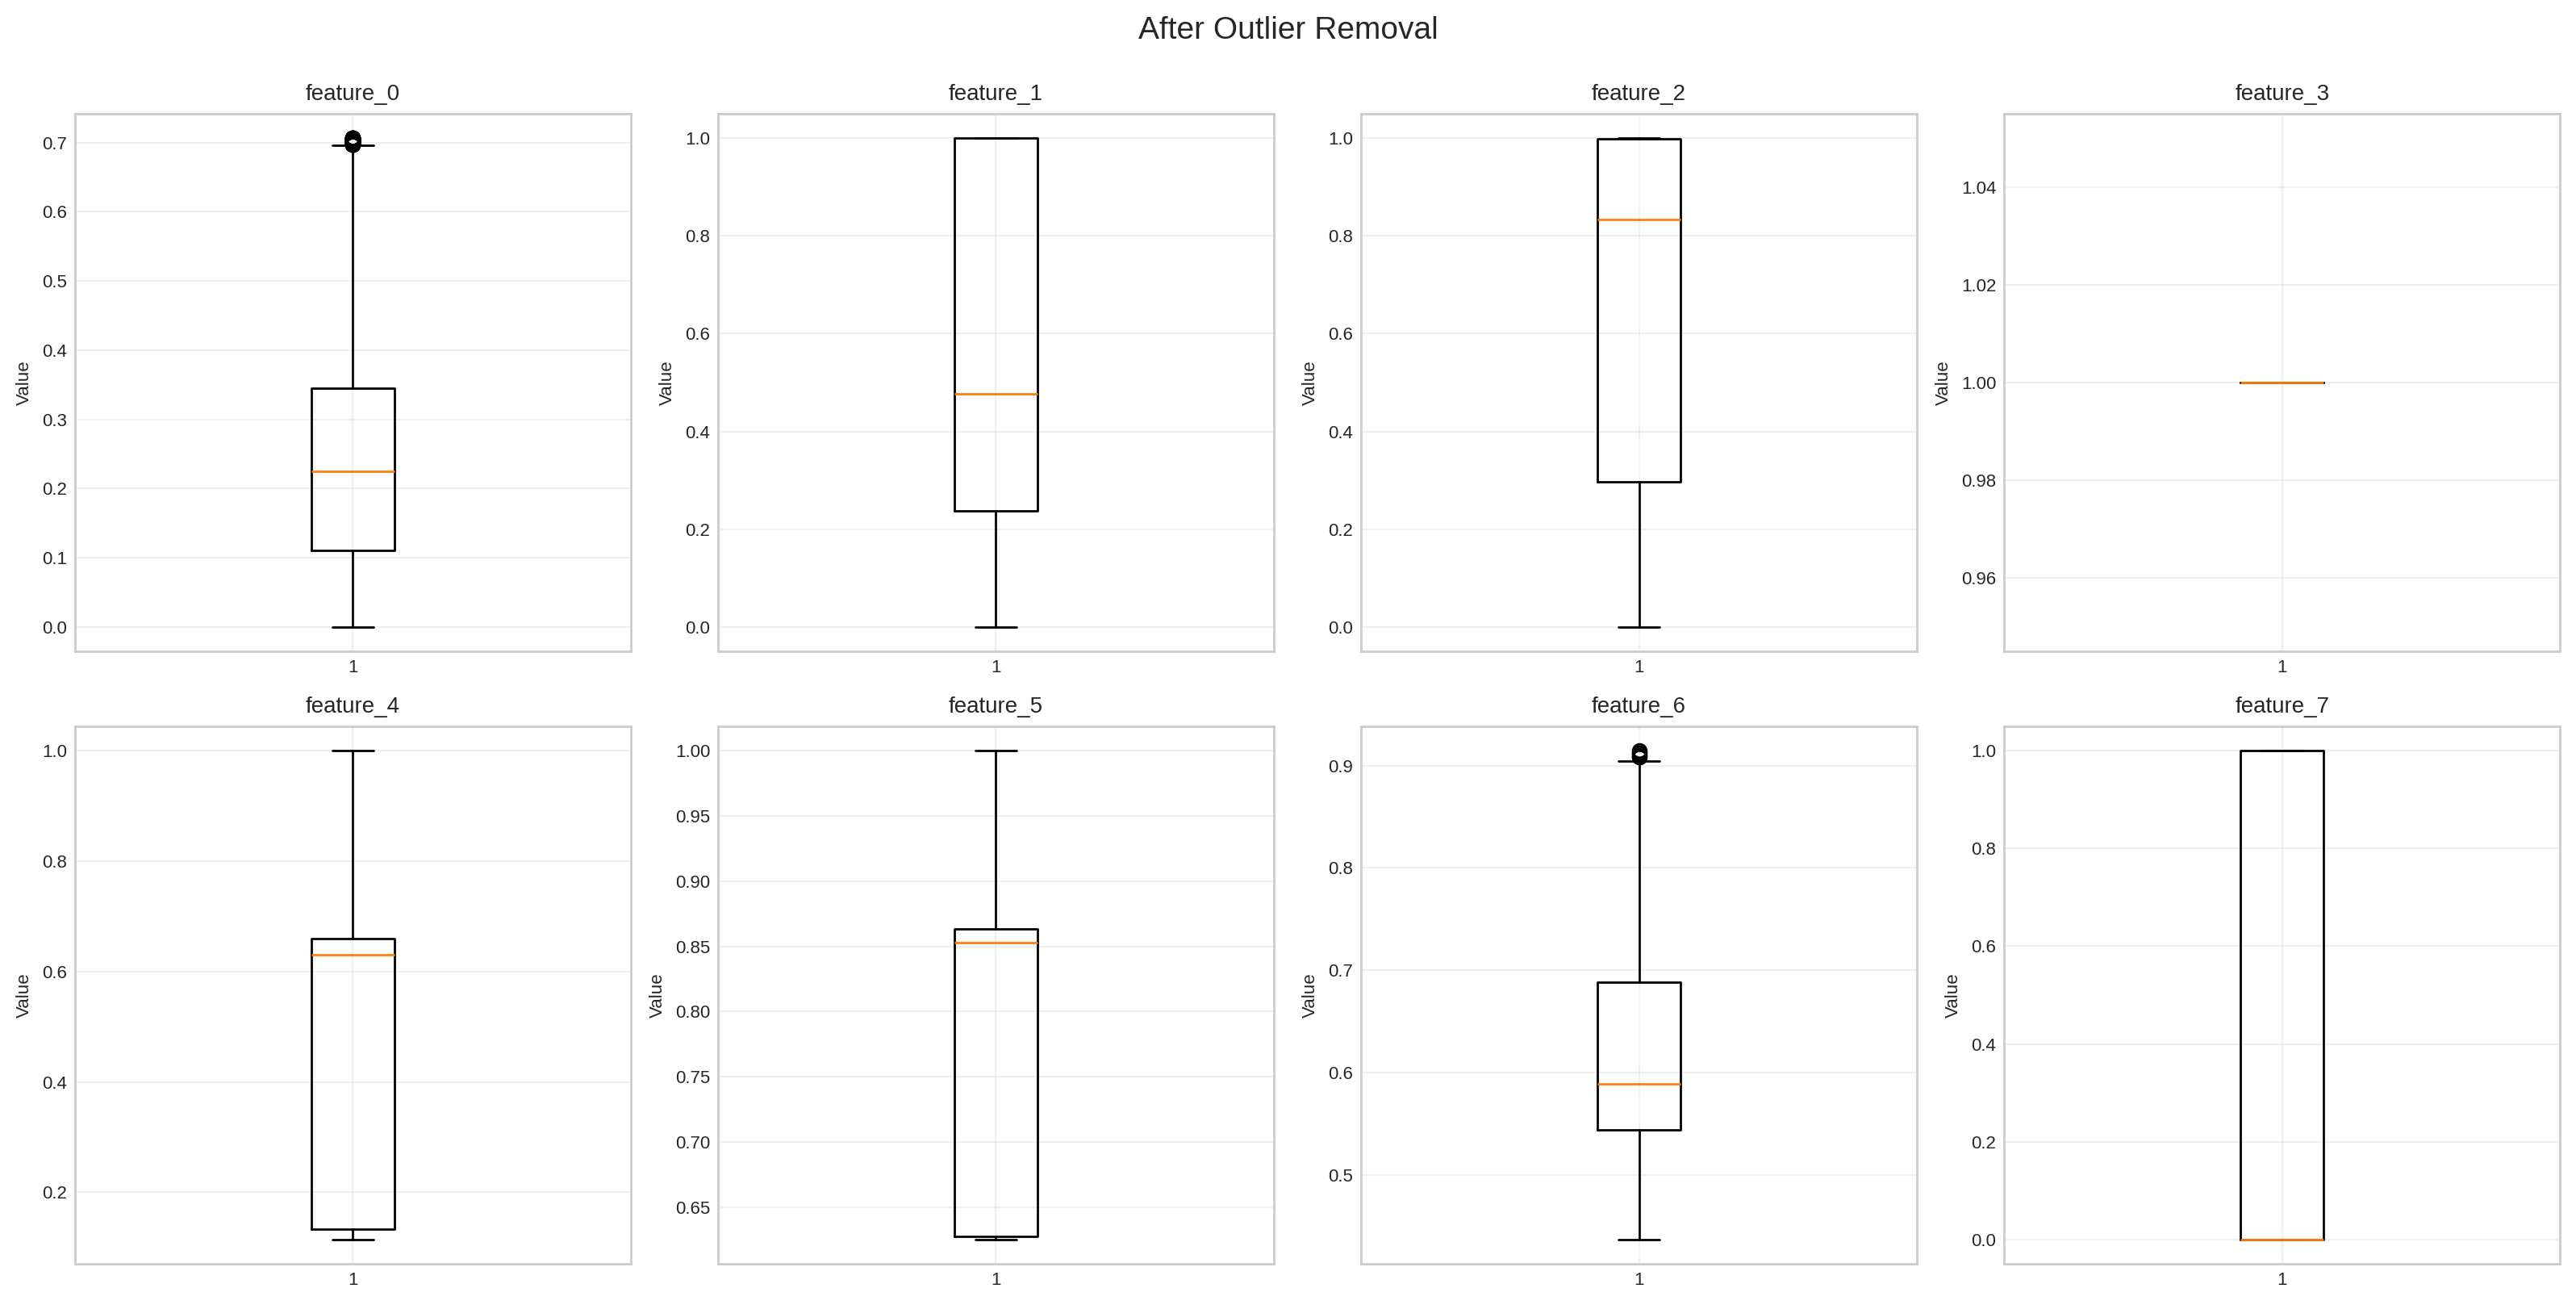


STATISTICS COMPARISON

Column               Metric     Original     Clean        Change    
----------------------------------------------------------------------
feature_0            Mean       0.25         0.24             -2.04%
                     Std        0.17         0.16             -4.53%
                     Min        0.00         0.00        
                     Max        1.00         0.71        

feature_1            Mean       0.57         0.57             -0.71%
                     Std        0.35         0.38             +8.37%
                     Min        0.00         0.00        
                     Max        1.00         1.00        

feature_2            Mean       0.68         0.67             -1.49%
                     Std        0.37         0.40             +8.16%
                     Min        0.00         0.00        
                     Max        1.00         1.00        

feature_3            Mean       0.85         1.00            +17.54%
  

In [ ]:
# STEP 1: Remove outliers from your training data
# Choose method: 'iqr' (recommended), 'zscore', or 'isolation'

X_train_clean, y_train_clean = remove_outliers_numpy(
    X_train=X_train,
    y_train=y_train,
    method='iqr',  # Options: 'iqr', 'zscore', 'isolation'
    column_names=None  # Provide your actual column names if you have them
)

# STEP 2: Now use the clean data for model training
# Your X_train_clean and y_train_clean are ready!

# Example:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train_clean, y_train_clean)
# predictions = model.predict(X_test)

In [ ]:
X_train_clean.shape

(51634, 8)

In [ ]:
y_train_clean.shape

(51634,)

# Training after outlier detection

# LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import sklearn

In [ ]:
model = keras.Sequential()
model.add(LSTM(100,
                return_sequences=True,
               input_shape=(1,X_train_clean.shape[1])
              ))
model.add(BatchNormalization())
model.add(LSTM(50,
                return_sequences=True,
               activation='tanh'
              ))
model.add(Dropout(0.5))
model.add(LSTM(10,
               return_sequences=True,
               activation='tanh',
              ))
model.add(Dropout(0.5))
model.add(Dense(100,
               activation='relu',
              ))
model.add(Dense(1))

In [ ]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        43,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 10)          │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 100)         │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,841 (304.07 KB)

 Trainable params: 77,641 (303.29 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-7, verbose=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train_clean, y_train_clean, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 20,
                    # shuffle = True,
                    batch_size = 500,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions = y_predictions[:,0][:,0]

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 920.3304 - val_loss: 668.0840 - learning_rate: 1.0000e-05
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 917.0602 - val_loss: 667.9054 - learning_rate: 1.0000e-05
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 910.6478 - val_loss: 667.9503 - learning_rate: 1.0000e-05
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 913.2348 - val_loss: 667.7403 - learning_rate: 1.0000e-05
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 915.8477 - val_loss: 667.2572 - learning_rate: 1.0000e-05
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 917.4469 - val_loss: 667.5247 - learning_rate: 1.0000e-05
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 923.6857 - val_loss: 668.2025 - learning_rate: 1.0000e-05
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 916.9420 - val_loss: 667.9438 - learning_rate: 1.0000e-05
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 917.4

# KNN

In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_neighbors': randint(1, 31),              # Random integers between 1 and 30
    'weights': ['uniform', 'distance'],         # Weight function
    'p': [1, 2],                                # 1 = Manhattan, 2 = Euclidean
    'leaf_size': randint(20, 50),               # Leaf size for tree algorithms
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute neighbors
}

# Create base model
knn = KNeighborsRegressor()

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['kNN'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

# Use model.score for R-squared
print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
# Use np.sqrt() for RMSE
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'algorithm': 'brute', 'leaf_size': 48, 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
Best CV score: 0.6777

R-squared error: 49.51%
Root Mean Squared Error: 38.74
CPU times: user 1.19 s, sys: 129 ms, total: 1.32 s
Wall time: 1min 58s


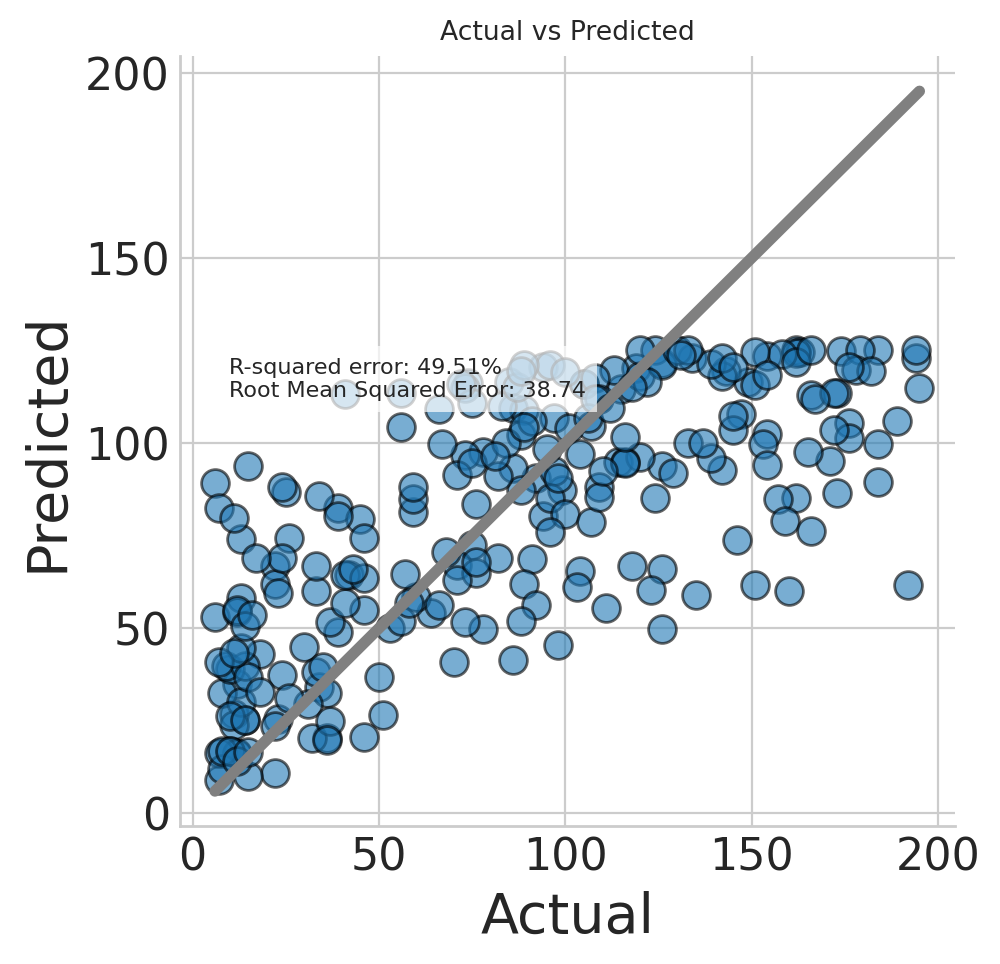

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

fig, ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

g = sns.scatterplot(
    x=y_test,
    y=y_predictions,
    s=100,
    alpha=0.6,
    linewidth=1,
    edgecolor='black',
    ax=ax
)

sns.lineplot(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    linewidth=4,
    color='gray',
    ax=ax
)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()
plt.show()


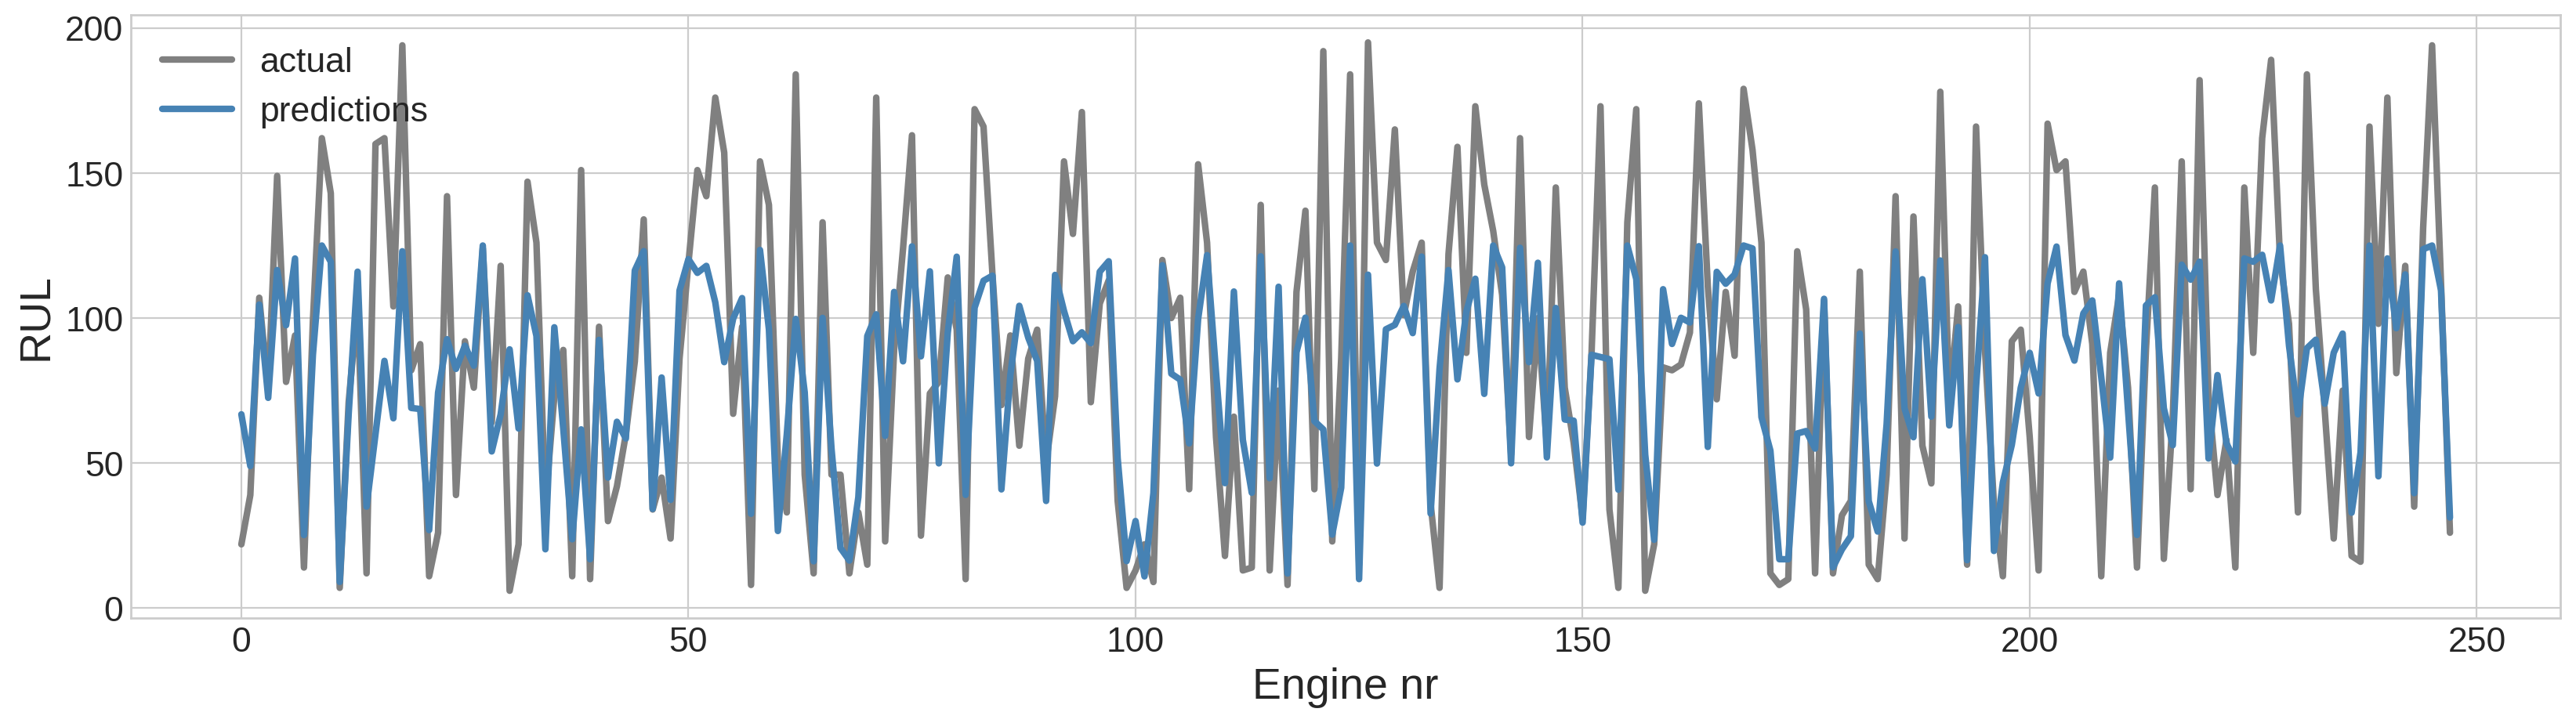

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# SVR

In [ ]:
%%time
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'C': loguniform(1, 1000),           # Log-uniform between 1 and 1000
    'gamma': loguniform(0.001, 1),      # Log-uniform between 0.001 and 1
    'epsilon': uniform(0.001, 0.1)      # Uniform between 0.001 and 0.101
}

# Create base model
svr = SVR(kernel="rbf")

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    svr,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['SVM'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

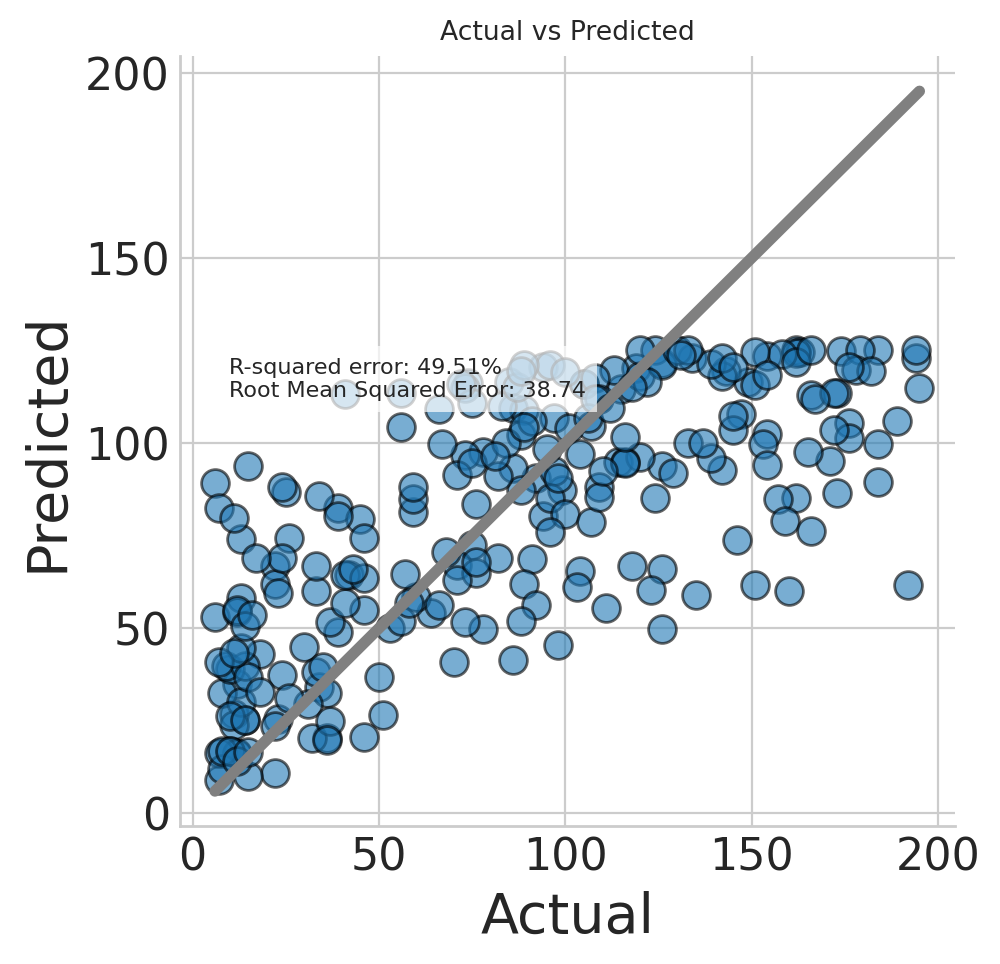

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

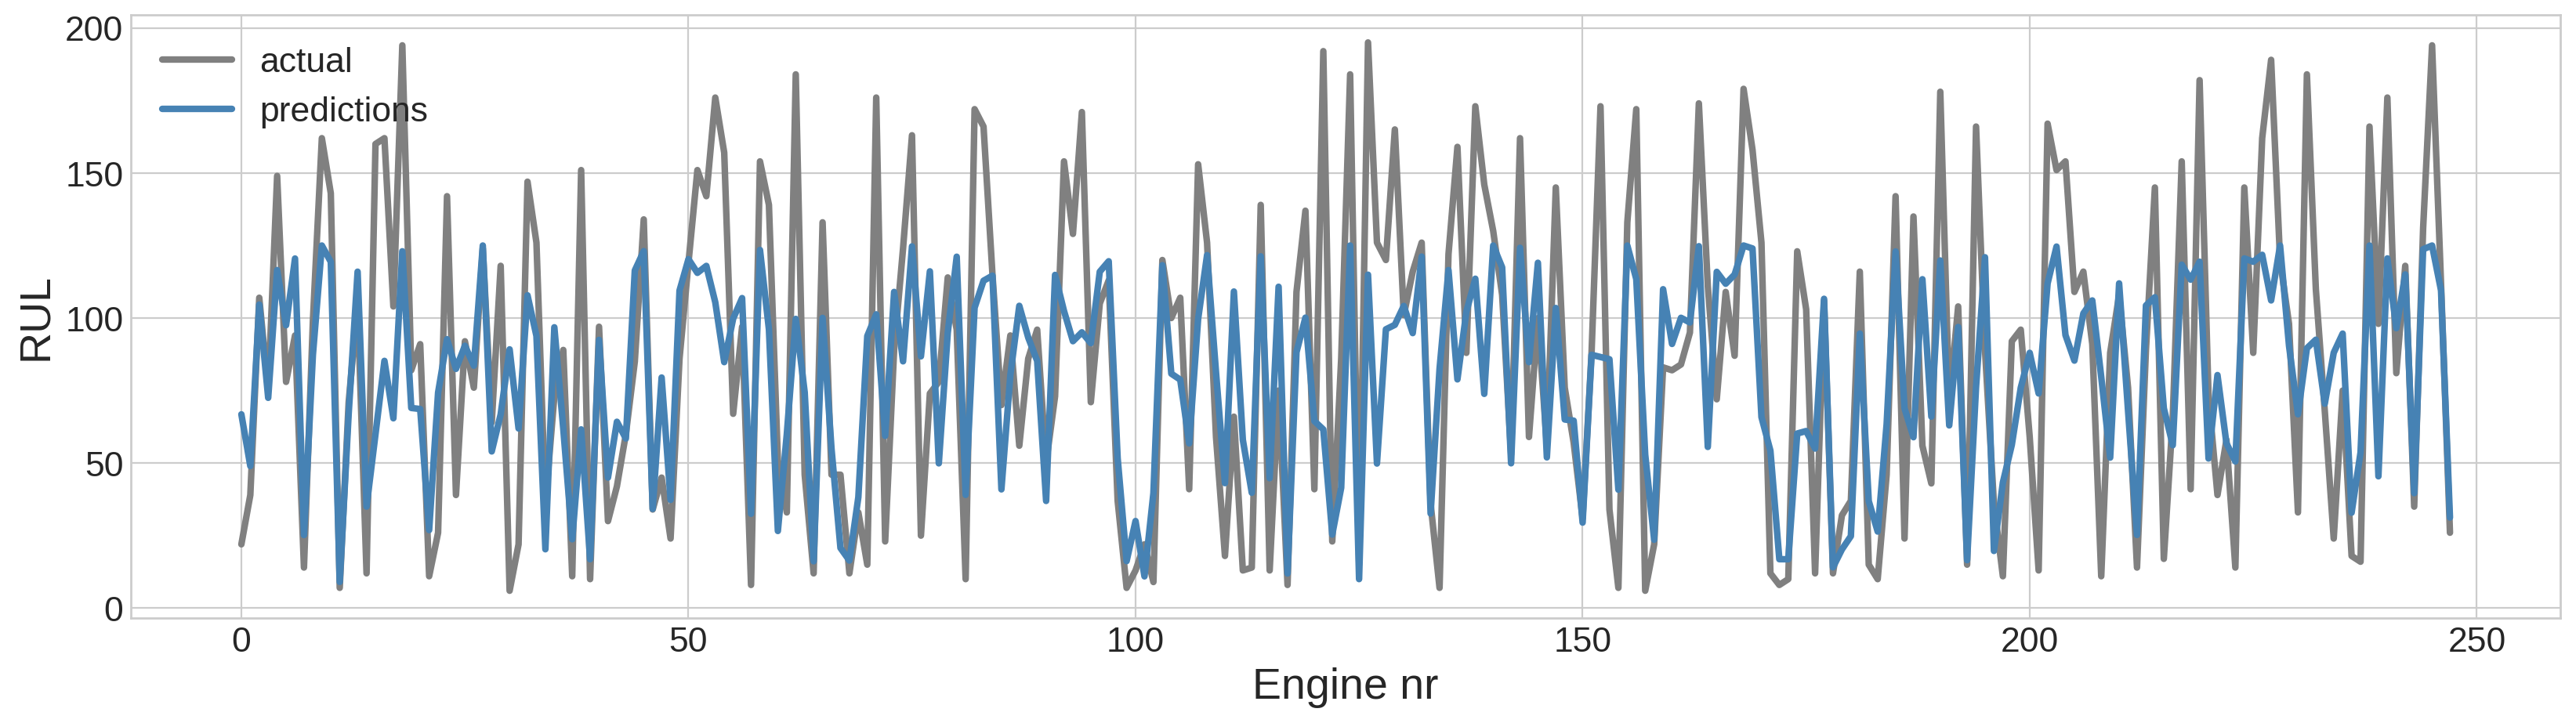

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(100, 600),              # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],        # Maximum depth of trees
    'min_samples_split': randint(2, 20),            # Minimum samples to split
    'min_samples_leaf': randint(1, 10),             # Minimum samples at leaf
    'max_features': ['sqrt', 'log2', None],         # Number of features to consider
    'bootstrap': [True, False],                     # Bootstrap samples
    'max_samples': uniform(0.7, 0.3)                # Fraction of samples (0.7 to 1.0)
}

# Create base model
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_distributions,
    n_iter=25,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['Random Forest'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best parameters: {'bootstrap': True, 'max_depth': 40, 'max_features': 'log2', 'max_samples': np.float64(0.8075397185632818), 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 300}
Best CV score: 0.7666

R-squared error: 52.79%
Root Mean Squared Error: 37.46
CPU times: user 41.3 s, sys: 498 ms, total: 41.8 s
Wall time: 12min 21s


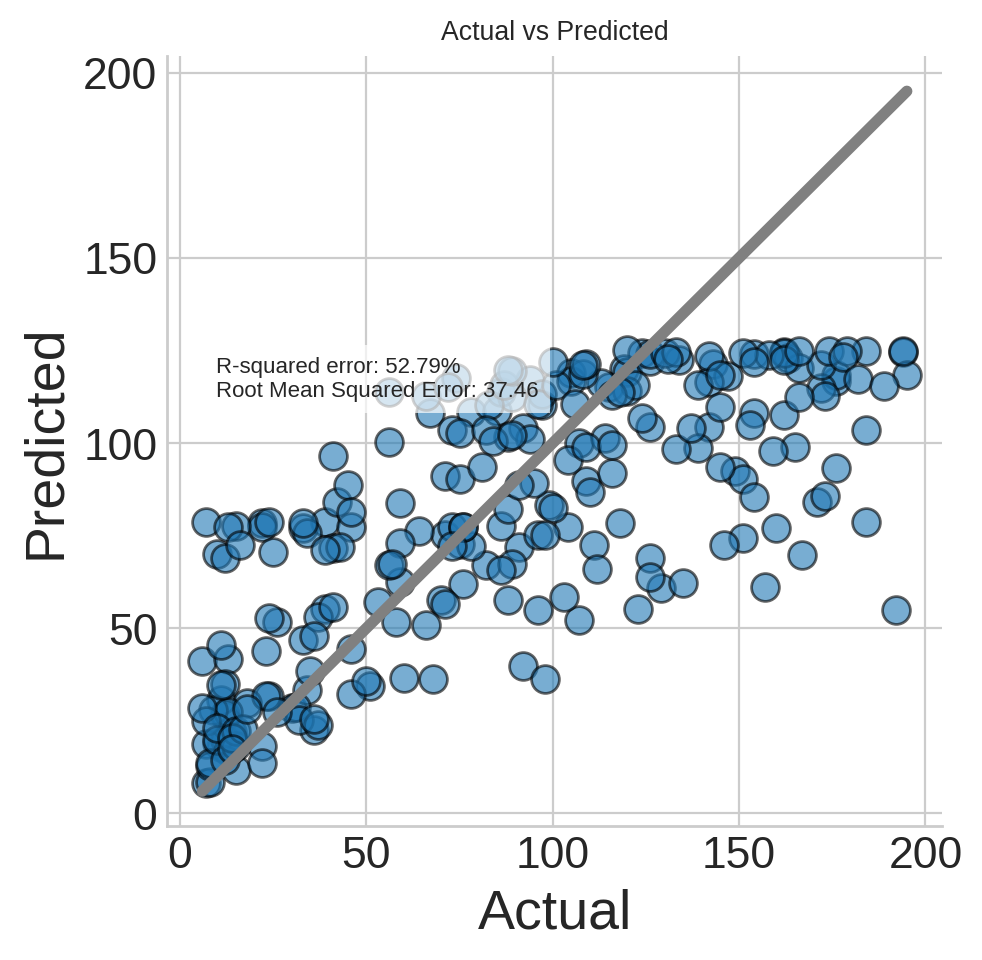

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=5,5

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

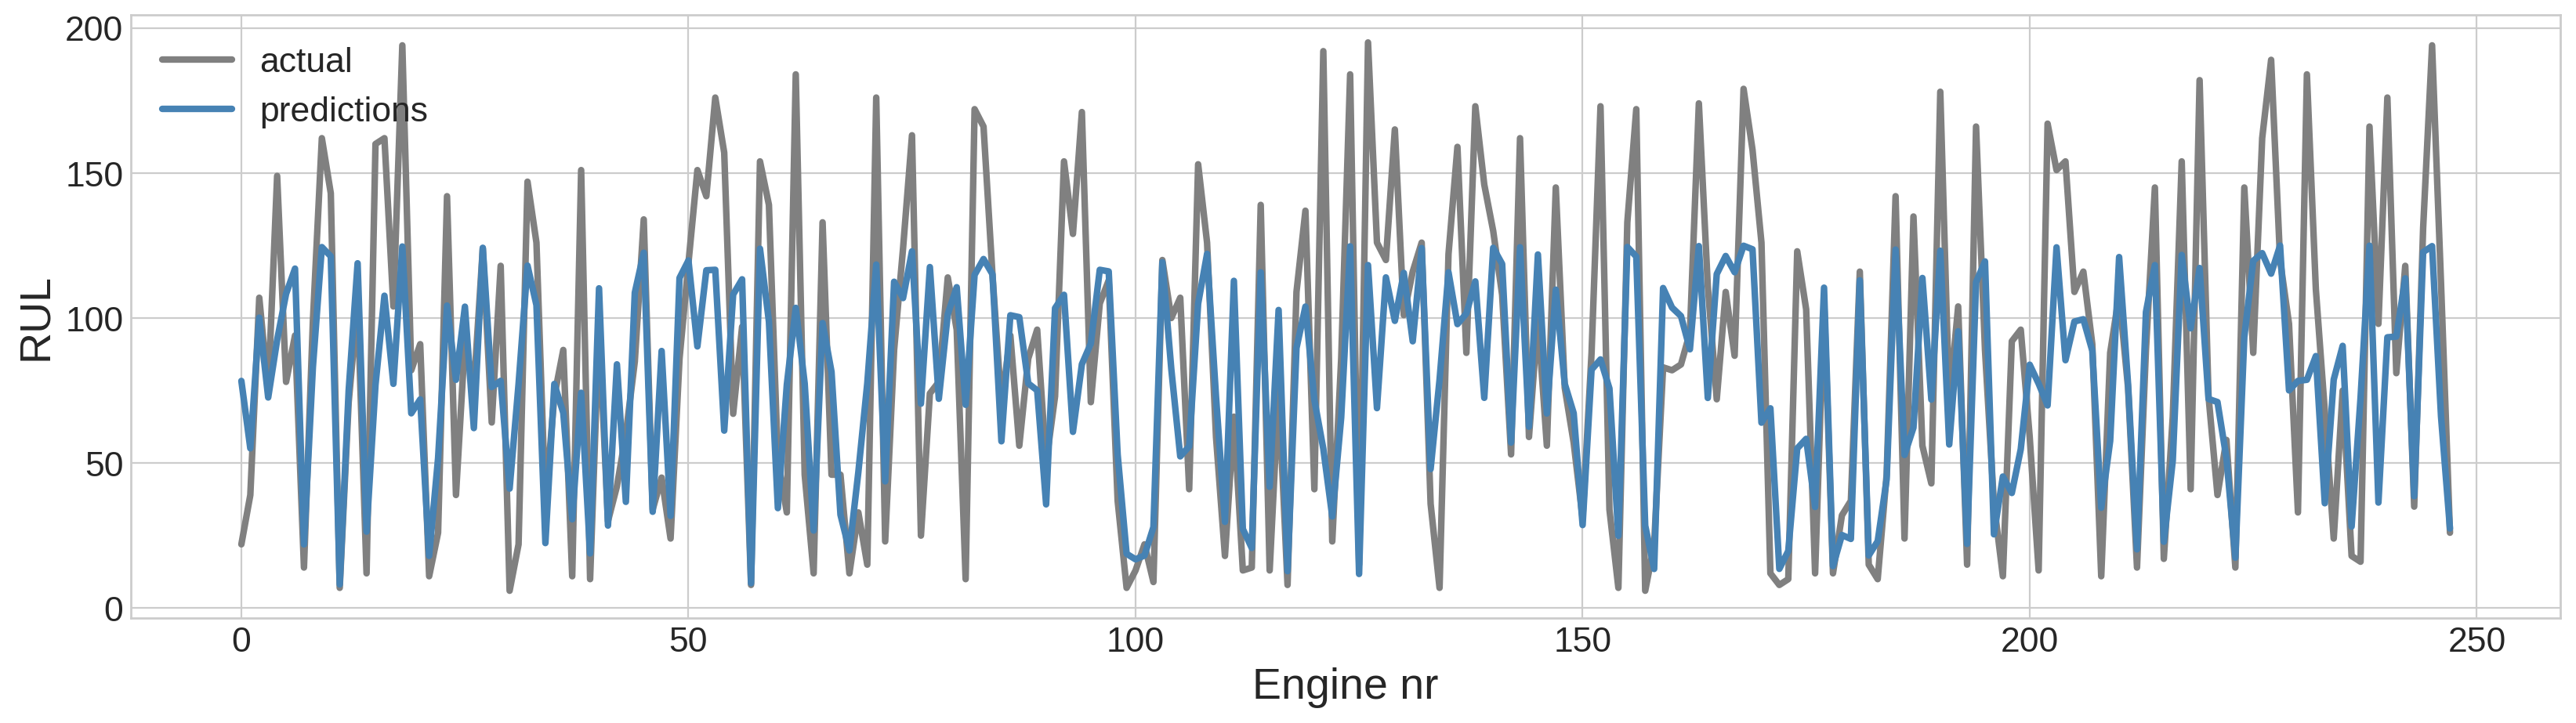

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# ADABoost

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(50, 500),                    # Number of boosting stages
    'learning_rate': uniform(0.01, 1.99),                # Learning rate (0.01 to 2.0)
    'loss': ['linear', 'square', 'exponential'],         # Loss function
    'estimator__max_depth': randint(1, 10),         # Max depth of base estimator
    'estimator__min_samples_split': randint(2, 20), # Min samples to split
    'estimator__min_samples_leaf': randint(1, 10)   # Min samples at leaf
}

# Create base model with decision tree estimator
base_estimator = DecisionTreeRegressor(random_state=42)
adaboost = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    adaboost,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['AdaBoost'] = [
    sklearn.metrics.r2_score(y_test, y_predictions),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'estimator__max_depth': 9, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 11, 'learning_rate': np.float64(0.10286466979509469), 'loss': 'exponential', 'n_estimators': 239}
Best CV score: 0.6984

R-squared error: 44.80%
Root Mean Squared Error: 40.51
CPU times: user 54.4 s, sys: 688 ms, total: 55.1 s
Wall time: 15min 47s


# XGBoost

In [ ]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(100, 1000),              # Number of boosting rounds
    'max_depth': randint(3, 10),                     # Maximum tree depth
    'learning_rate': uniform(0.01, 0.29),            # Learning rate (0.01 to 0.3)
    'subsample': uniform(0.6, 0.4),                  # Subsample ratio (0.6 to 1.0)
    'colsample_bytree': uniform(0.6, 0.4),           # Feature sampling (0.6 to 1.0)
    'min_child_weight': randint(1, 10),              # Minimum sum of instance weight
    'gamma': uniform(0, 0.5),                        # Minimum loss reduction
    'reg_alpha': uniform(0, 1),                      # L1 regularization
    'reg_lambda': uniform(0, 1)                      # L2 regularization
}

# Create base model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # Faster training
)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_distributions,
    n_iter=25,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['XGBoost'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best parameters: {'colsample_bytree': np.float64(0.8430179407605753), 'gamma': np.float64(0.08526206184364576), 'learning_rate': np.float64(0.02886496196573106), 'max_depth': 6, 'min_child_weight': 9, 'n_estimators': 415, 'reg_alpha': np.float64(0.5632882178455393), 'reg_lambda': np.float64(0.3854165025399161), 'subsample': np.float64(0.6063865008880857)}
Best CV score: 0.7650

R-squared error: 46.43%
Root Mean Squared Error: 39.91
CPU times: user 4.05 s, sys: 111 ms, total: 4.16 s
Wall time: 2min 44s


In [ ]:
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
                                                                     'RMSE': '{:.2f}',
                                                                     'time to train':'{:.3f}',
                                                                     'time to predict':'{:.3f}',
                                                                     'total time':'{:.3f}',
                                                                     })

# Best model

Random Forest